# Ref

https://github.com/nosyarlin/YoPoCo/blob/master/ComparatorNet.ipynb
https://www.researchgate.net/post/Accuracy_starts_high_then_decreases_for_every_epoch

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.utils import resample


# Dataset

In [3]:
yogaTrain = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/yogaTrain1.csv')
yogaTest = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/yogaTest1.csv')

In [4]:
# Gộp dữ liệu cho EDA
frames = [yogaTrain, yogaTest]
yogaData = pd.concat(frames)

In [5]:
# Xóa cột img
yogaData = yogaData.drop(['img'], axis=1)

In [6]:
# 
yogaData.head().T

,0,1,2,3,4
x1,0.139340,0.104850,0.255354,0.085922,0.289735
y1,0.171807,0.336305,0.391517,0.254351,0.132382
z1,-0.152829,0.029908,-0.062290,-0.022495,-0.362925
x2,0.246744,0.243539,0.309335,0.220335,0.349598
y2,0.359648,0.231375,0.513727,0.246836,0.338587
z2,-0.403705,-0.278404,-0.253215,-0.282698,-0.539181
x3,0.267609,0.240953,0.345149,0.262186,0.355366
y3,0.340197,0.317024,0.493377,0.230336,0.290335
z3,0.217117,0.375915,0.197415,0.288124,-0.023722
x4,0.229204,0.251242,0.310987,0.235961,0.340279


In [7]:
yogaData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1030 entries, 0 to 340
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1030 non-null   float64
 1   y1      1030 non-null   float64
 2   z1      1030 non-null   float64
 3   x2      1030 non-null   float64
 4   y2      1030 non-null   float64
 5   z2      1030 non-null   float64
 6   x3      1030 non-null   float64
 7   y3      1030 non-null   float64
 8   z3      1030 non-null   float64
 9   x4      1030 non-null   float64
 10  y4      1030 non-null   float64
 11  z4      1030 non-null   float64
 12  x5      1030 non-null   float64
 13  y5      1030 non-null   float64
 14  z5      1030 non-null   float64
 15  x6      1030 non-null   float64
 16  y6      1030 non-null   float64
 17  z6      1030 non-null   float64
 18  x7      1030 non-null   float64
 19  y7      1030 non-null   float64
 20  z7      1030 non-null   float64
 21  x8      1030 non-null   float64
 22  y

In [8]:
yogaData.id.value_counts()

3    129
4    120
1    119
9    116
6    115
5    111
7    109
2    107
8    104
Name: id, dtype: int64

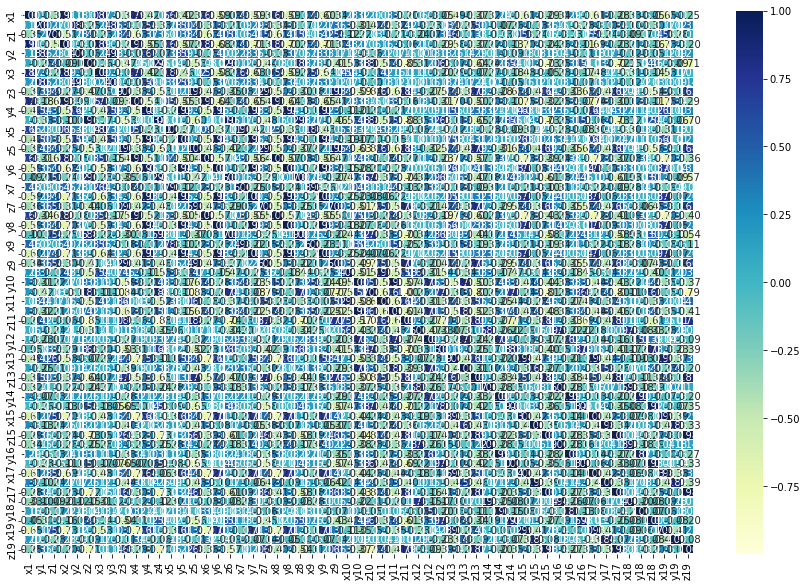

In [ ]:
# Ma trận tương quan
fig , ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(yogaData.drop(['id'], axis=1).corr(),
           annot=True,
            linewidth=0.5,
            fmt='.2f',
            cmap="YlGnBu",
           )

# Data preprocessing

##Train set

In [9]:
yogaTrain = yogaTrain.drop(['img'], axis=1)

In [10]:
# chuyển data series dataframe sang numpy array
trainData = []

for i in range(yogaTrain.shape[0]):
  x = yogaTrain.iloc[i].to_numpy()
  trainData.append(x)

trainData = np.array(trainData)

In [11]:
print(trainData.shape)  # bao gồm 15 đặc trưng góc và id
print(trainData[0])
print(trainData[0][:57])

(689, 58)
[ 0.13934046  0.17180669 -0.15282945  0.24674408  0.3596482  -0.40370506
  0.26760948  0.34019718  0.21711727  0.22920385  0.65221548 -0.45482001
  0.23860537  0.6164692   0.23192204  0.22121058  0.92392767 -0.42098227
  0.22954816  0.87323648  0.18199493  0.1793367   0.92353571 -0.44564778
  0.1916461   0.89042491  0.12303007  0.54193425  0.52156222 -0.21512777
  0.54148108  0.50179142  0.21538529  0.52967036  0.89680207 -0.28956765
  0.5244605   0.85438216  0.18200658  0.78025818  0.88757914 -0.13324346
  0.75763774  0.85993898  0.3796607   0.79863524  0.84771508 -0.10766665
  0.78380394  0.82178205  0.40128917  0.89477622  0.9506824  -0.09465278
  0.85604846  0.92510116  0.35846543  1.        ]
[ 0.13934046  0.17180669 -0.15282945  0.24674408  0.3596482  -0.40370506
  0.26760948  0.34019718  0.21711727  0.22920385  0.65221548 -0.45482001
  0.23860537  0.6164692   0.23192204  0.22121058  0.92392767 -0.42098227
  0.22954816  0.87323648  0.18199493  0.1793367   0.92353571 -0.

In [ ]:
# # test merge 2 features
# x1 = np.concatenate((trainData[0][:15], trainData[1][:15]))
# if (trainData[0][15] == trainData[1][15]):
#   y = 1
# else:
#   y = 0
# print(x1.shape)
# print(x1)
# print(y)

In [ ]:
# trainData[0][:57]

In [12]:
# Merge đặc trưng từng đôi một, nếu cùng id thì label là 1, khác id thì label 0
# có  sample 
X_raw_train = []
y_raw_train = []
trues_train = []
falses_train = []

for i in range(trainData.shape[0]):
  for j in range(trainData.shape[0]):
    x = np.concatenate((trainData[i][:57], trainData[j][:57]))
    X_raw_train.append(x)
    if (trainData[i][57] == trainData[j][57]):
      y_raw_train.append(1)
      trues_train.append(x)
    else:
      y_raw_train.append(0)
      falses_train.append(x)
X_raw_train = np.array(X_raw_train)
y_raw_train = np.array(y_raw_train).reshape(trainData.shape[0]**2, 1)
trues_train = np.array(trues_train)
falses_train = np.array(falses_train)

In [13]:
print(X_raw_train.shape)
print(y_raw_train.shape)
print(trues_train.shape)
print(falses_train.shape)

(474721, 114)
(474721, 1)
(52817, 114)
(421904, 114)


In [14]:
# Balanced train data
small_falses_train = resample(falses_train, n_samples=trues_train.shape[0])

balanced_X_train = np.concatenate([trues_train, small_falses_train])
balanced_y_train = np.concatenate([np.ones((trues_train.shape[0],)), np.zeros((trues_train.shape[0]))])

In [15]:
print(balanced_X_train.shape)
print(balanced_y_train.shape)

(105634, 114)
(105634,)


In [16]:
X_train = balanced_X_train
y_train = balanced_y_train
print(X_train)
print(y_train)

[[ 0.13934046  0.17180669 -0.15282945 ...  0.85604846  0.92510116
   0.35846543]
 [ 0.13934046  0.17180669 -0.15282945 ...  0.95250744  0.90990412
   0.18646614]
 [ 0.13934046  0.17180669 -0.15282945 ...  0.79972607  0.79636192
   0.41512862]
 ...
 [ 0.43738908  0.65486491 -0.0286665  ...  0.93516833  0.78708077
  -0.19233759]
 [ 0.52937102  0.37492925 -0.18714029 ...  0.76745981  0.86775965
   0.08437204]
 [ 0.43008322  0.68569481  0.01439268 ...  0.932082    0.91007114
  -0.25145218]]
[1. 1. 1. ... 0. 0. 0.]


##Test set

In [17]:
yogaTest = yogaTest.drop(['img'], axis=1)

In [18]:
# chuyển data series dataframe sang numpy array
testData = []

for i in range(yogaTest.shape[0]):
  x = yogaTest.iloc[i].to_numpy()
  testData.append(x)

testData = np.array(testData)

In [19]:
print(testData.shape)  # bao gồm 15 đặc trưng góc và id
print(testData[0])
print(testData[0][:57])

(341, 58)
[ 0.0580068   0.11201215 -0.08928797  0.16769981  0.33610809 -0.40992346
  0.20028162  0.32494432  0.32617149  0.1662381   0.66103089 -0.4653064
  0.19931692  0.61936855  0.33540794  0.15395907  0.94902021 -0.43517894
  0.18026036  0.89547598  0.27786982  0.10764778  0.95705771 -0.45291302
  0.1444951   0.9204241   0.21773976  0.51356626  0.5098148  -0.25593382
  0.52425766  0.48391095  0.25663254  0.56763005  0.92820585 -0.35229474
  0.57406479  0.89257765  0.21457416  0.84968251  0.89385664 -0.16082123
  0.83734953  0.88181913  0.42311576  0.86868459  0.84065521 -0.1290846
  0.86168957  0.82985717  0.44554427  0.97140515  0.96319723 -0.10235495
  0.9527998   0.95074058  0.37171799  1.        ]
[ 0.0580068   0.11201215 -0.08928797  0.16769981  0.33610809 -0.40992346
  0.20028162  0.32494432  0.32617149  0.1662381   0.66103089 -0.4653064
  0.19931692  0.61936855  0.33540794  0.15395907  0.94902021 -0.43517894
  0.18026036  0.89547598  0.27786982  0.10764778  0.95705771 -0.452

In [20]:
# Merge đặc trưng từng đôi một, nếu cùng id thì label là 1, khác id thì label 0
# có 393*393 sample 
X_raw_test = []
y_raw_test = []
trues_test = []
falses_test = []

for i in range(testData.shape[0]):
  for j in range(testData.shape[0]):
    x = np.concatenate((testData[i][:57], testData[j][:57]))
    X_raw_test.append(x)
    if (testData[i][57] == testData[j][57]):
      y_raw_test.append(1)
      trues_test.append(x)
    else:
      y_raw_test.append(0)
      falses_test.append(x)
X_raw_test = np.array(X_raw_test)
y_raw_test = np.array(y_raw_test).reshape(testData.shape[0]**2,1)
trues_test = np.array(trues_test)
falses_test = np.array(falses_test)

In [21]:
print(X_raw_test.shape)
print(y_raw_test.shape)
print(trues_test.shape)
print(falses_test.shape)

(116281, 114)
(116281, 1)
(13173, 114)
(103108, 114)


In [22]:
# Balanced train data
small_falses_test = resample(falses_test, n_samples=trues_test.shape[0])

balanced_X_test = np.concatenate([trues_test, small_falses_test])
balanced_y_test = np.concatenate([np.ones((trues_test.shape[0],)), np.zeros((trues_test.shape[0]))])

In [23]:
print(balanced_X_test.shape)
print(balanced_y_test.shape)

(26346, 114)
(26346,)


In [24]:
X_test = balanced_X_test
y_test = balanced_y_test

## Normalization

In [25]:
 # Chuẩn hóa dữ liệu về scacle [0, 1]
from sklearn.preprocessing import Normalizer

f = np.concatenate([X_train, X_test])
f = np.array(f)

transformer = Normalizer().fit(f)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

In [26]:
print(X_train.shape)
print(y_train.shape)

(105634, 114)
(105634,)


# Training Model

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout
from keras.callbacks import CSVLogger

In [28]:
# Define network
model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Activation('relu'),
    Dense(128),
    BatchNormalization(),
    Activation('relu'),
    Dense(1),
    BatchNormalization(),
    Activation('sigmoid'),
])

model.compile(optimizer=keras.optimizers.Adam(lr=0.00001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               14720     
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 128)               0

In [30]:
# Train
csv_logger = CSVLogger("model_history_log.csv", append=True)
history = model.fit(x=X_train, y=y_train,
                    batch_size=32, epochs=70,
                    verbose=1, validation_split=0.33,
                    callbacks=[csv_logger])

Epoch 1/70
2212/2212 [==============================] - 17s 7ms/step - loss: 0.5718 - accuracy: 0.7224 - val_loss: 0.3350 - val_accuracy: 0.8334
Epoch 2/70
2212/2212 [==============================] - 13s 6ms/step - loss: 0.4614 - accuracy: 0.8732 - val_loss: 0.3067 - val_accuracy: 0.8485
Epoch 3/70
2212/2212 [==============================] - 9s 4ms/step - loss: 0.4338 - accuracy: 0.9122 - val_loss: 0.2745 - val_accuracy: 0.8854
Epoch 4/70
2212/2212 [==============================] - 8s 4ms/step - loss: 0.4149 - accuracy: 0.9344 - val_loss: 0.2435 - val_accuracy: 0.9120
Epoch 5/70
2212/2212 [==============================] - 8s 4ms/step - loss: 0.3982 - accuracy: 0.9472 - val_loss: 0.2501 - val_accuracy: 0.9179
Epoch 6/70
2212/2212 [==============================] - 9s 4ms/step - loss: 0.3843 - accuracy: 0.9557 - val_loss: 0.2331 - val_accuracy: 0.9284
Epoch 7/70
2212/2212 [==============================] - 7s 3ms/step - loss: 0.3730 - accuracy: 0.9598 - val_loss: 0.2104 - val_accurac

In [31]:
# Lưu model đã được huấn luyện
model.save('/content/drive/MyDrive/Colab Notebooks/model/model_v8.h5')

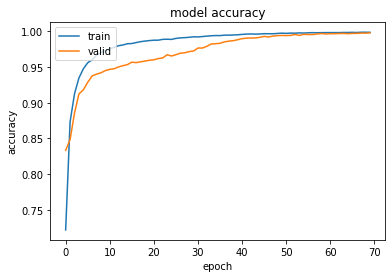

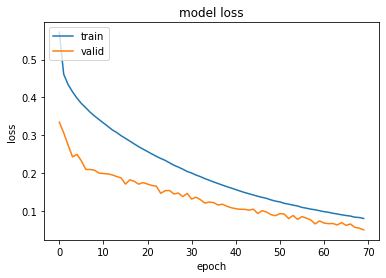

In [32]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

## Đánh giá model

In [33]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn import metrics

In [34]:
# Predict trên tập test
y_pred = model.predict(X_test)

In [ ]:
y_test

array([1., 1., 1., ..., 0., 0., 0.])

In [35]:
y_pred

array([[0.92678344],
       [0.9364854 ],
       [0.9332769 ],
       ...,
       [0.02259842],
       [0.06871685],
       [0.0282186 ]], dtype=float32)

In [36]:
y_pred_label = []
for i in range(y_pred.shape[0]):
  if y_pred[i] >= 0.5:
    y_pred_label.append(1)
  else:
    y_pred_label.append(0)

In [37]:
y_pred_labels = np.array(y_pred_label)

Text(0.5, 15.0, 'Predicted label')

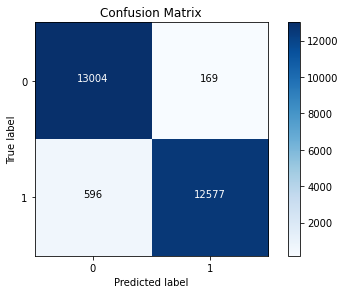

In [38]:
# Vẽ confusion matrix
import itertools

cm = metrics.confusion_matrix(y_test, y_pred_labels)
# print(cm)

classes = [0, 1]

# plot CM
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, format(cm[i, j], fmt),
           horizontalalignment='center',
           color='white' if cm[i, j] > thresh else 'black')
  
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [39]:
results = {}
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]

# Accuracy
metric = "ACC"
results[metric] = (TP + TN) / (TP + TN + FP + FN)
print(f"{metric} is {results[metric]: .3f}")

# Sensitivity / Recall
metric = "TPR"
results[metric] = TP / (TP + FN)
print(f"{metric} is {results[metric]: .3f}")

# Specificity
metric = "TNR"
results[metric] = TN / (TN + FP)
print(f"{metric} is {results[metric]: .3f}")

#  Precision
metric = "PPV"
results[metric] = TP / (TP + FP)
print(f"{metric} is {results[metric]: .3f}")

# F1 score
metric = "F1"
results[metric] = 2 / (1 / results["PPV"] + 1 / results["TPR"])
print(f"{metric} is {results[metric]: .3f}")

ACC is  0.971
TPR is  0.955
TNR is  0.987
PPV is  0.987
F1 is  0.970


# Load model

In [ ]:
model_load = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/pose/model/model_v7.h5')

In [ ]:
model_load.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               14720     
                                                                 
 batch_normalization_6 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_7 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 activation_7 (Activation)   (None, 128)              

# Predict

In [ ]:
x_test_2_96 = np.concatenate((testData[0][:15], testData[94][:15]))

In [ ]:
x_test = x_test_2_96.reshape(1, 30)

In [ ]:
x_test.shape

(1, 30)

In [ ]:
y_pred_2_96 = model_load.predict(x_test)

In [ ]:
y_pred_2_96

array([[1.]], dtype=float32)